## 네이버 검색 API를 활용하여 뉴스를 크롤링하고 본문 키워드를 워드클라우드로 시각화
### 네이버 검색 API 활용
- API(Application Programming Interface): 두 소프트웨어(사용자, 제공자)가 서로 통신할 수 있게 해주는 메커니즘과 해당 기능을 사용할 수 있게 하는 프로그램
- Library와의 차이점은 Library는 특정 기능을 구현하기 위한 코드의 집합으로 내부 코드를 이해하고 사용해야 하지만, API 는 통신이 가능한 상황에서 간단한 명령으로 필요한 기능들을 상대적으로 쉽게 구현할 수 있게 지원하므로 사용하기가 수월함
- API는 비용이 드는 경우가 많음. 무료로 쓰는 건 횟수 제한이 있음.
- 네이버 개발자 센터 페이지 : https://developers.naver.com/main/
- 네이버 API: 뉴스, 백과사전, 블로그, 쇼핑, 웹 문서, 전문지식, 지식IN, 책, 카페 등 분야별로 네이버 검색 결과를 JSON형태로 변환하는 기능을 지원(검색 API의 하루 호출 한도는 25,000회)
- JSON(Javascript Object Notation)
  - JS객체 문법을 따르는 텍스트 기반의 데이터 포맷으로 여러개의 딕셔너리들이 계층적으로 분포하는 형태,인간이 읽고 쓰기 쉽고, 기계가 구문을 분석하기 쉽게 경량화된 데이터 교환 형식
  - 다른 프로그래밍 언어에서도 많이 쓰고, 파이썬에서는 JSON을 딕셔너리로 변환하여 주로 사용함
  - 반드시 ""로 묶어줘야함.

### 네이버 검색 API 호출 및 검색 결과 확인

In [13]:
import json
import requests as req

client_id = 'ZpPuKZQn0p1EAdPUtlRd'
client_secret = '9ey2xWS2ZQ'

keyword = '경제'
display_amount = 100
start_position = 1

# 기본 url에 각 파라미터들을 쿼리스트링(?로 시작해서 여러 파라미터들을 &로 이어주는 형식) 형식으로 전달
# query: 검색어 작성(필수!)
# display: 한번에 표시할 검색 결과 개수(기본값:10, 최댓값: 100)
# start: 검색 시작 위치(기본값: 1, 최댓값: 1000)
url = f'https://openapi.naver.com/v1/search/news.json?query={keyword}&display={display_amount}&start={start_position}'

# 네이버 API 호출시 HTTP header에 client_id와 client_secret을 포함해서 전송해야함(네이버 API사용을 위한 유저 인증과정)
N_A = {"X-Naver-Client-Id":client_id, "X-Naver-Client-Secret":client_secret}

# 웹 통신 요청
res = req.get(url, headers=N_A)

# 파싱(text를 json코드로 전환)
my_json = json.loads(res.text)

print('my_json 자료형: ', type(my_json)) # 딕셔너리
print('my_json 키 종류: ', my_json.keys()) # 딕셔너리 키 값들
print('my_json items 개수: ', len(my_json['items'])) # 아이템 개수
print('첫 번째 뉴스 키 종류', my_json['items'][0].keys())

# 네이버뉴스에 대한 정보만 출력
cnt = 1
for i in my_json['items']:
    # 네이버 뉴스만 검색
    if 'n.news.naver' in i.get('link'):
        print('Count: ', cnt)
        print('Title: ', i.get('title'))
        print('link: ', i.get('link'))
        print('description: ', i.get('description'))
        print()
        cnt += 1

my_json 자료형:  <class 'dict'>
my_json 키 종류:  dict_keys(['lastBuildDate', 'total', 'start', 'display', 'items'])
my_json items 개수:  100
첫 번째 뉴스 키 종류 dict_keys(['title', 'originallink', 'link', 'description', 'pubDate'])
Count:  1
Title:  구윤철 후보자 '법인세 원상복구' 요구에 &quot;감세 효과 종합적 검토&quot;
link:  https://n.news.naver.com/mnews/article/014/0005378563?sid=101
description:  구 후보자는 최근 몇년간 반복된 세수 추계 오차와 관련해 &quot;내부적으로 민간 위원과 세수 추계를 같이 한거나 <b>경제</b>협력개발기구(OECD)와 국제통화기금(IMF)으로부터 기술 자문을 받아 선진국의 세수 추계 방안을... 

Count:  2
Title:  대구 일반시민 소비쿠폰 28만원씩 받는다…21일부터 ‘출생년도 요일제...
link:  https://n.news.naver.com/mnews/article/011/0004510317?sid=102
description:  민생회복 소비쿠폰은 내수부진으로 침체된 민생<b>경제</b>에 활력을 불어넣고 <b>경제</b>선순환 구조를 형성하기 위한 것으로, 대구는 6841억 원 규모로 지급될 예정이다. 지급 금액을 보면 1차 신청의 경우 일반 대구시민은 18만 원... 

Count:  3
Title:  동두천시, 정부에 미군 공여지 반환·보상 요구
link:  https://n.news.naver.com/mnews/article/417/0001089889?sid=102
description:  박 시장은 &quot;동두천시는 매년 약 5278억원의 <b>경제</b> 손실과 300억원의 지방세 감소로 재정이 악화되고 있으며... 아울러 &quot;국가안

### 워드클라우드 실습

In [16]:
!pip install wordcloud

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   ---------- ---------------------------- 81.9/301.2 kB 762.6 kB/s eta 0:00:01
   ---------------------------------------  297.0/301.2 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------  297.0/301.2 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 1.6 MB/s eta 0:00:00


<>:5: SyntaxWarning: invalid escape sequence '\W'
<>:5: SyntaxWarning: invalid escape sequence '\W'
C:\Users\USER\AppData\Local\Temp\ipykernel_9004\2033427639.py:5: SyntaxWarning: invalid escape sequence '\W'
  wc = WordCloud(font_path = "C:\Windows\Fonts\Gulim.ttc", # 한글 글꼴 지정


(-0.5, 399.5, 199.5, -0.5)

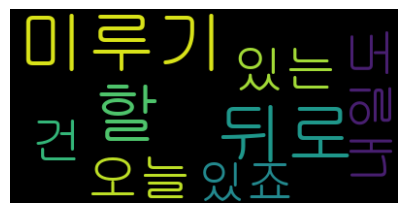

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 워드클라우드 객체 생성
wc = WordCloud(font_path = "C:\Windows\Fonts\Gulim.ttc", # 한글 글꼴 지정
               background_color = 'black',               # 워드클라우드 이미지 배경색 지정
               max_words = 10,                           # 워드클라우드 내부 표시될 단어 개수
               random_state = 99,                        # 단어의 출력 위치를 고정하기 위한 랜덤시드 설정
               stopwords = ['등','있다','및','수','이'])  # 제외하고 싶은 단어 설정(불용어 처리)
text = '뒤로 미루기! 뒤로 미루기. 오늘 할 수 있는 건 내일도 할 수 있죠'

# generate: 문자열에서 단어의 빈도(띄워쓰기 기준)를 자동 계산하여 워드클라우드 생성
wc.generate(text)

fig = plt.figure(figsize=(5,5))

# interpolation: 보간법, 이미 알려진 값 사이의 알려지지 않은 값을 추정하는 것
# bilinear로 이중선형 보간법을 적용하여 단어의 엣지 부분을 부드럽게 출력해줌.
plt.imshow(wc, interpolation='bilinear')
plt.axis('off') # x축, y축이 나오지 않음.

### streamlit을 활용하여 네이버 검색 API를 활용한 워드클라우드 출력 사이트 만들기

In [43]:
%%writefile module/myApp28.py

import json
import requests as req
import time
import pandas as pd
import streamlit as st
import folium
import streamlit_folium as sf
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from PIL import Image
from bs4 import BeautifulSoup as bs

# ======================================================함수 설정==============================================================
# 네이버 검색 API를 활용한 뉴스 검색 결과를 반환해 주는 함수
def getRequest(keyword, display, start):
    url = f'https://openapi.naver.com/v1/search/news.json?query={keyword}&display={display}&start={start}'
    N_A = {"X-Naver-Client-Id":st.session_state['client_id'], # 세션 설정에서 초기화를 시켜줄 예정
           "X-Naver-Client-Secret":st.session_state['client_secret']} # 세션 설정에서 초기화를 시켜줄 예정
    res = req.get(url, headers=N_A)
    my_json = json.loads(res.text)
    return my_json['items']

# 워드클라우드 시각화 함수
def wcChart(corpus, back_mask, max_words, emp): # 매개변수: 문자열 텍스트, 배경 이미지, 최대 출력 단어수, empty공간
    if back_mask == 'oval':
        img = Image.open('data/background_1.png')
    elif back_mask == 'bubble':
        img = Image.open('data/background_2.png')
    elif back_mask == 'heart':
        img = Image.open('data/background_3.png')
    else:
        img = Image.open('data/background_0.png')
    
    # 워드클라우드에 적용하기 위해 이미지를 배열로 변환    
    my_mask = np.array(img)
    
    wc = WordCloud(font_path = "C:\Windows\Fonts\Gulim.ttc", # 한글 글꼴 지정
               background_color = 'black',
               max_words = max_words,
               random_state = 99,
               stopwords = ['등','있다','및','수','이','a','the','an','of','to','in','and','said','was','is','by'],
               mask = my_mask) # 배경 지정
    
    # generate: 문자열에서 단어의 빈도(띄워쓰기 기준)를 자동 계산하여 워드클라우드 생성
    wc.generate(corpus) # corpus: 말뭉치라는 뜻
    
    fig = plt.figure(figsize=(10,10))

    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    st.pyplot(fig)
    
    emp.info(':orange[**WordCloud Image generated successfully!**]', icon = ':smile:')

# ======================================세션 설정===========================================
if 'client_id' not in st.session_state:
    st.session_state['client_id'] = '' # id 써도 됨.

if 'client_secret' not in st.session_state:
    st.session_state['client_secret'] = '' # pw 써도 됨.

# ===============================사이드바 설정(client_id, client_secret 입력 부분)===============================

with st.sidebar.form(key = 'form1', clear_on_submit = False):
    st.header('Naver API settings')
    client_id = st.text_input('Client ID: ', value = st.session_state['client_id'])
    
    # type = 'password': 텍스트 입력시 보이지 않게 처리(비밀번호 등을 입력받을 때 사용)
    client_secret = st.text_input('Client Secret: ', value = st.session_state['client_secret'], type = 'password')
    if st.form_submit_button('OK'):
        st.session_state['client_id'] = client_id
        st.session_state['client_secret'] = client_secret
        st.write('setting complete!:)')
        st.rerun()

# =========================================메인 화면 설정===================================================
# 진행상황을 띄워줄 빈 공간 설정(문구는 최종 출력만 나오도록 empty로 설정)
chart_emp = st.empty()

try:
    with st.form(key='Search', clear_on_submit=False):
        search_keyword = st.selectbox('keyword: ',['경제','정치','사회','국제','언어','IT','문화'])
        data_amount = st.slider('volume(100): ',min_value = 1, max_value = 5, value = 1, step = 1)
        # 워드클라우드 배경 마스크 이미지 선택
        back_mask = st.radio('choose a background: ',['default','oval','bubble','heart'], horizontal = True)
        if st.form_submit_button('print'):
            chart_emp.info('red[**loading data...**]', icon = '💤')
            corpus = '' # 수집된 문자열이 담길 변수 설정
            items = [] # 뉴스 항목이 담길 리스트
            
            # 입력받은 수집 분량(data_amount)만큼 반복해서 뉴스 기사 정보 가져오기
            for i in range(data_amount):
                items.extend(getRequest(search_keyword, 100, 100*i+1)) # 검색어, 한번에 표시할 양, 시작지점
                
            # 네이버 검색 API로 얻은 링크로 각각 들어가서 본문 내용 크롤링
            for item in items: # 위에서 먼저 데이터를 수집해야 items에 값이 들어감.
                if 'n.news.naver' in item['link']: # item은 딕셔너리, items는 리스트 타입
                    news_url = item['link']
                    res = req.get(news_url, headers = {'User_Agent':'Mozilla'}) # 헤더에 브라우저로 인식되게 설정
                    soup = bs(res.text, 'lxml')                                # 파싱(bs 객체화)
                    news_tag = soup.select_one('#dic_area')                     # 뉴스 본문을 품은 dic_area 아이디로 접근
                    
                    if news_tag:
                        corpus += news_tag.text + ' ' # 본문의 텍스트를 corpus에 계속 추가하기
                        
            st.write('수집된 corpus이 길이: ', len(corpus))
            
            # 워드클라우드 생성(corpus길이가 적으면 별루임. 길이가 100개 이상일 때 출력되게 조건 설정)
            if len(corpus) >= 100:
                chart_emp.info(':red[**creating image...**]', icon = '💤')
                wcChart(corpus, back_mask, 70, chart_emp)
            else:
                chart_emp.error(':red[**not enough corpus...**]', icon = '😓')

except:
    chart_emp.error('please fill out the form.')

Overwriting module/myApp28.py
